# D600 Task 1 Linear Regression Analysis

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "D600 Task 1 Dataset 1 Housing Information.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the dataset
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
     ID        Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
0  4922  255614.8992         566.62      1.000000            4         779.42   
1  5009  155586.0947        1472.34      1.000000            2         656.13   
2  4450  131050.8324         550.00      1.779354            3         754.57   
3  1070  151361.7125         941.81      2.035254            2         439.59   
4   400  113167.6128         550.00      1.064644            3         353.03   

   CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  ...  \
0      20.56          5.62      39.46                 10.08  ...   
1      15.62          5.63      40.51                  7.89  ...   
2      12.47          9.20      48.38                 23.74  ...   
3      22.22          7.08      94.67                  5.22  ...   
4       8.28          5.93      16.80                 43.13  ...   

   RenovationQuality  LocalAmenities  TransportAccess  Fireplace  HouseColo

In [4]:
# Import necessary libraries
import pandas as pd

# Descriptive statistics for dependent and independent variables
selected_columns = ['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'CrimeRate', 
                    'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter', 'LocalAmenities', 'TransportAccess']

# Calculate descriptive statistics
descriptive_stats = df[selected_columns].describe()

# Calculate mode and range for each variable
modes = df[selected_columns].mode().iloc[0]  # First mode for each column
ranges = df[selected_columns].max() - df[selected_columns].min()  # Range for each column

# Print descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

# Print mode and range
print("\nModes:")
print(modes)
print("\nRanges:")
print(ranges)

Descriptive Statistics:
              Price  SquareFootage  NumBathrooms  NumBedrooms    CrimeRate  \
count  7.000000e+03    7000.000000   7000.000000  7000.000000  7000.000000   
mean   3.072820e+05    1048.947459      2.131397     3.008571    31.226194   
std    1.501734e+05     426.010482      0.952561     1.021940    18.025327   
min    8.500000e+04     550.000000      1.000000     1.000000     0.030000   
25%    1.921075e+05     660.815000      1.290539     2.000000    17.390000   
50%    2.793230e+05     996.320000      1.997774     3.000000    30.385000   
75%    3.918781e+05    1342.292500      2.763997     4.000000    43.670000   
max    1.046676e+06    2874.700000      5.807239     7.000000    99.730000   

       SchoolRating    AgeOfHome  DistanceToCityCenter  LocalAmenities  \
count   7000.000000  7000.000000           7000.000000     7000.000000   
mean       6.942923    46.797046             17.475337        5.934579   
std        1.888148    31.779701             12.024

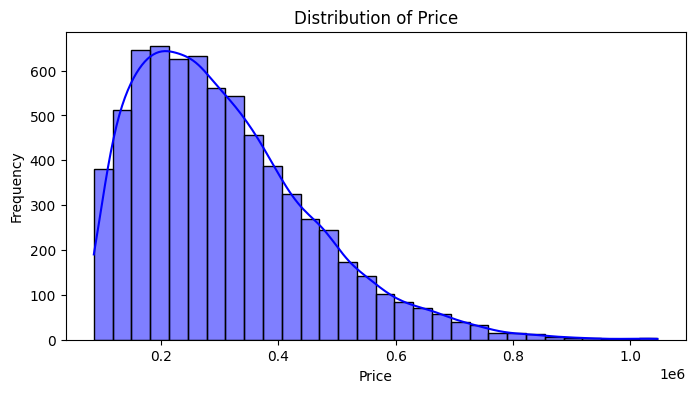

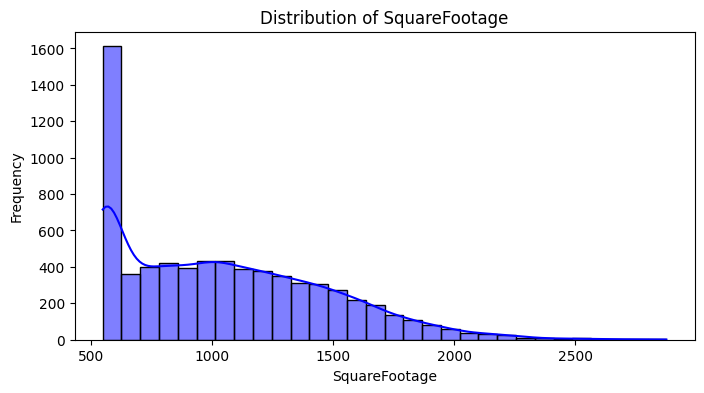

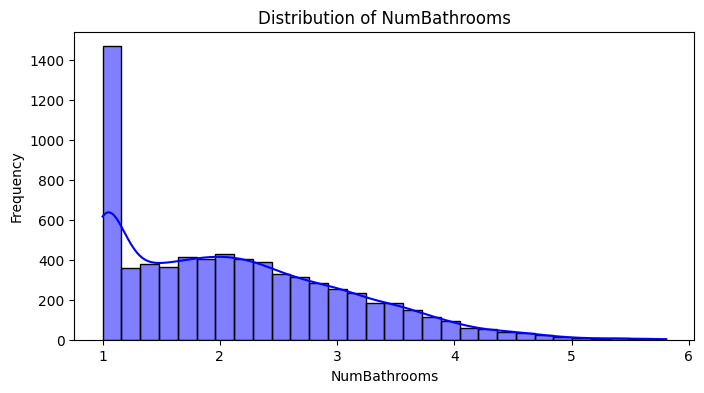

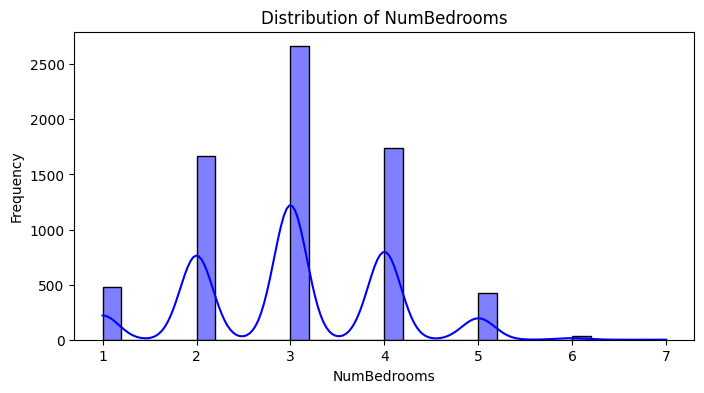

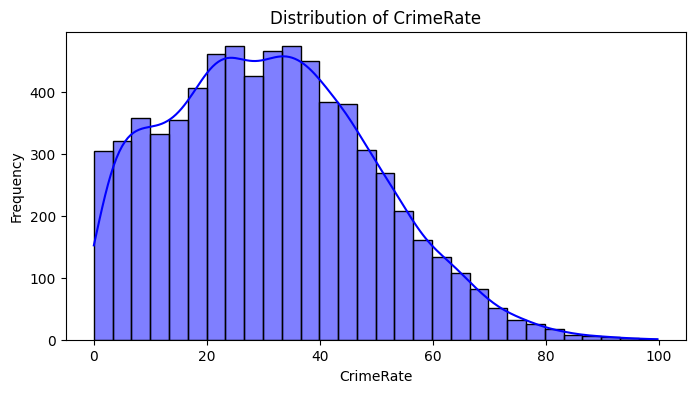

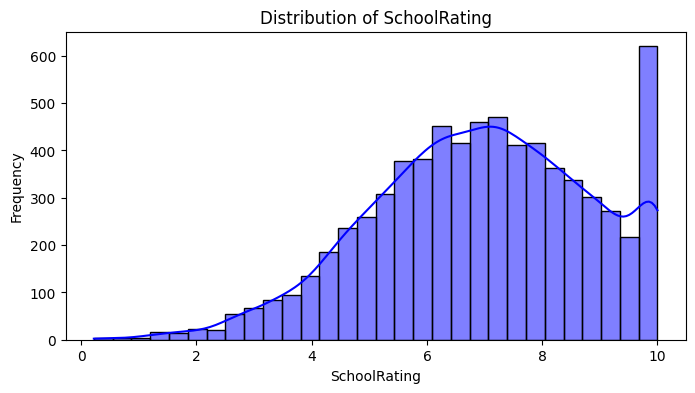

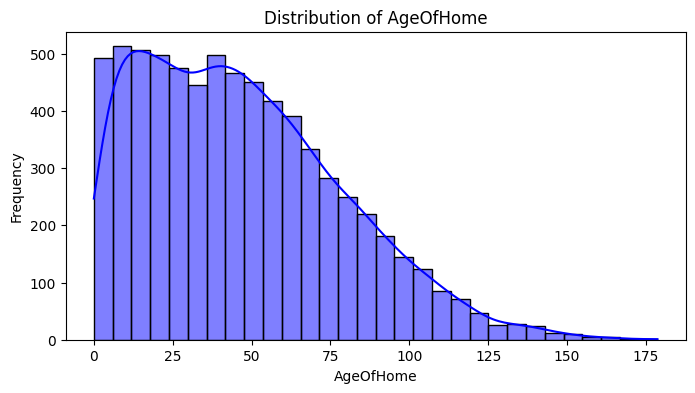

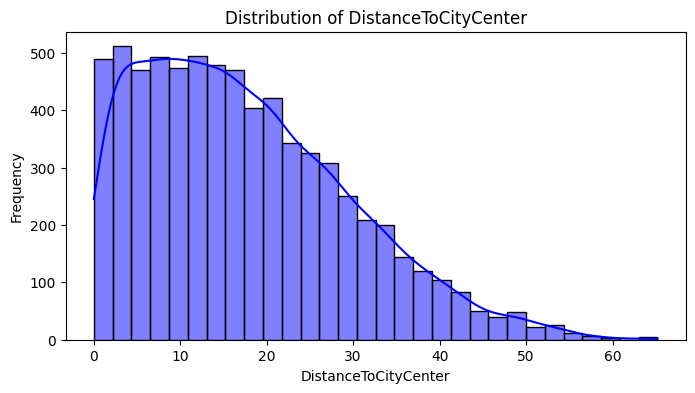

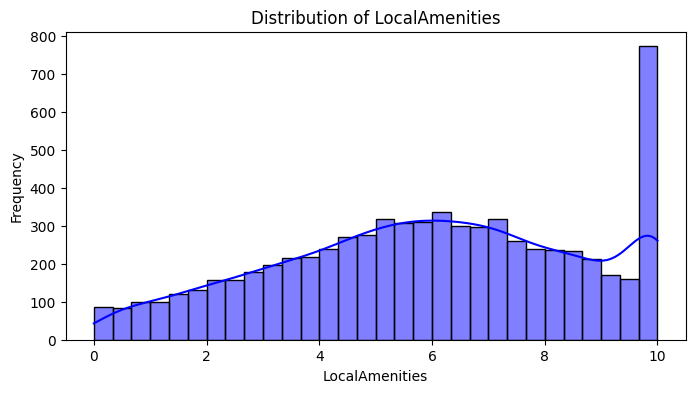

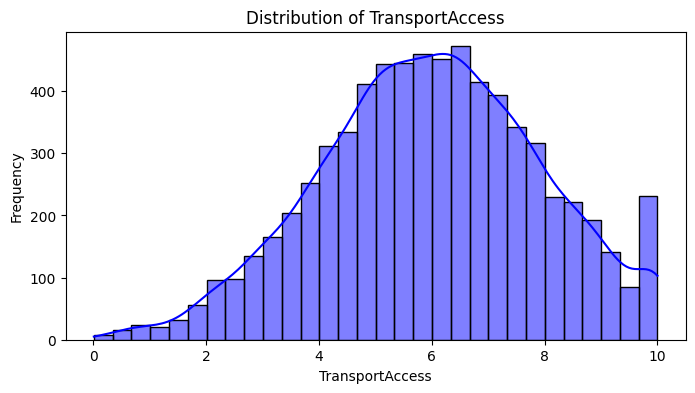

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate visualizations for each variable
for column in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

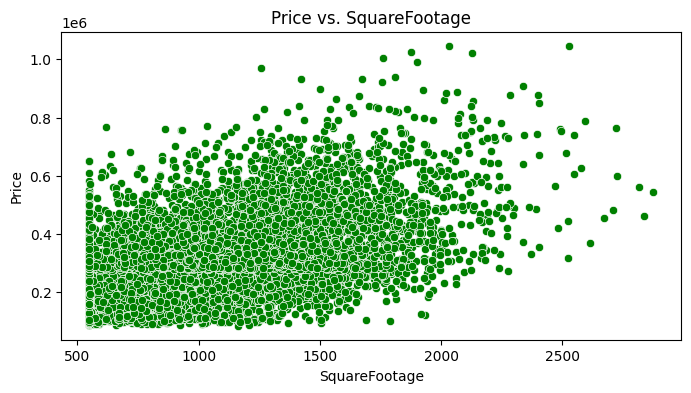

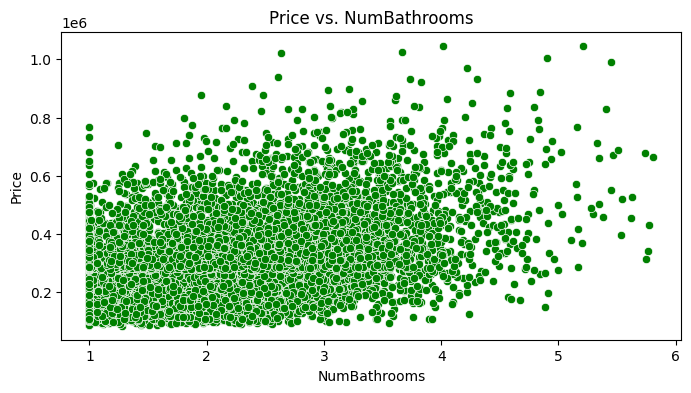

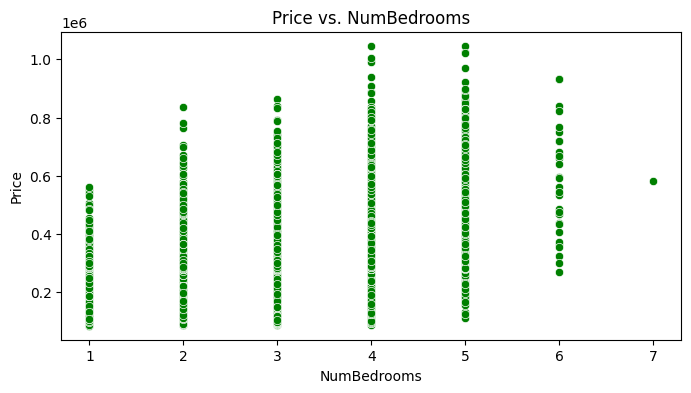

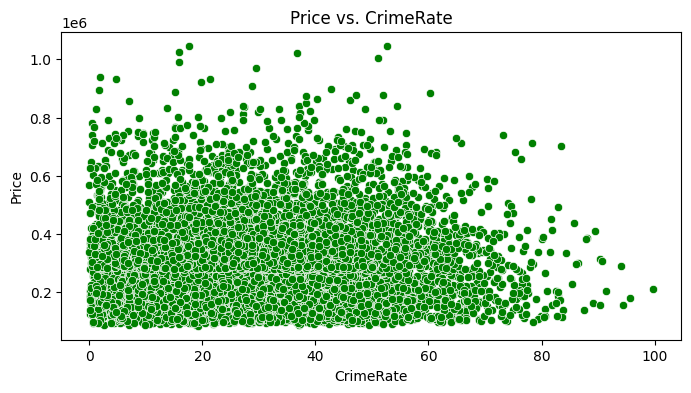

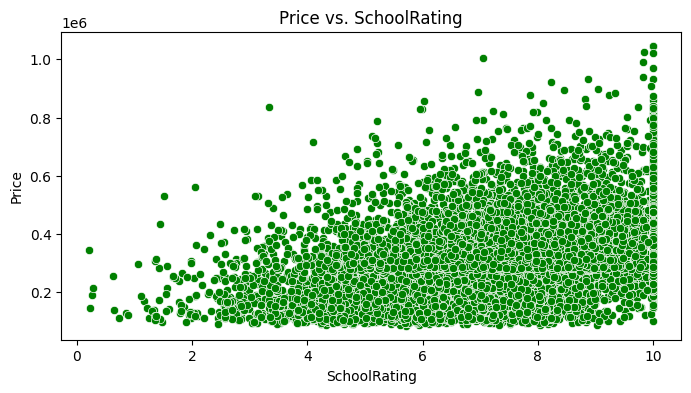

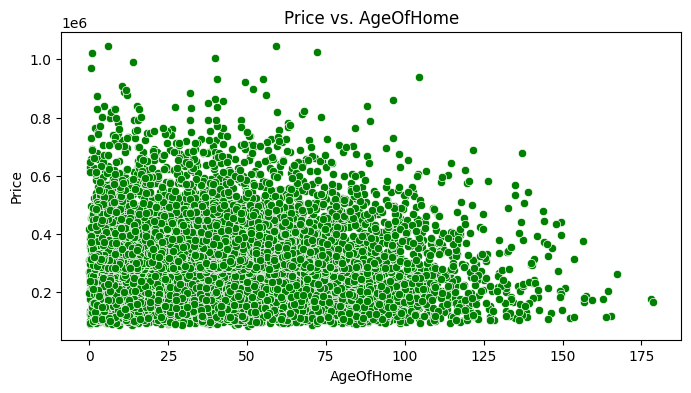

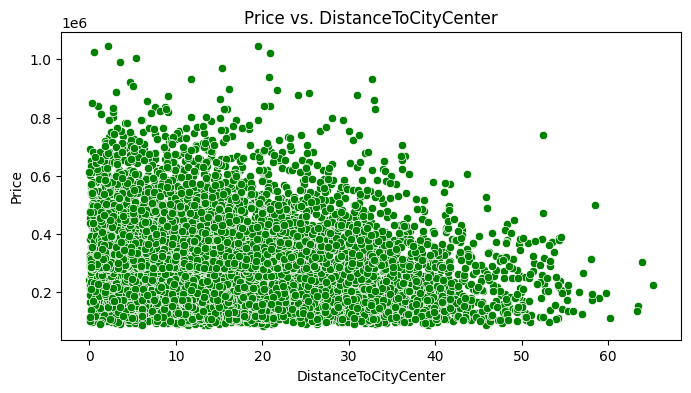

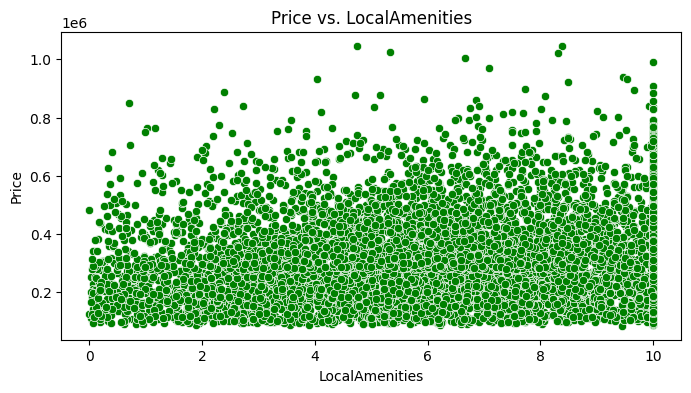

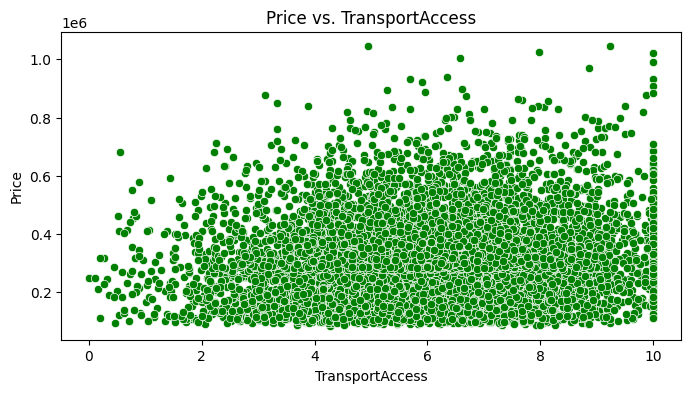

In [6]:
# Bivariate visualizations: Price vs. each independent variable
for column in selected_columns[1:]:  # Skip 'Price' as it's the dependent variable
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[column], y=df['Price'], color='green')
    plt.title(f"Price vs. {column}")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Select relevant columns
selected_columns = ['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'CrimeRate', 
                    'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter', 'LocalAmenities', 'TransportAccess']
df_selected = df[selected_columns]

# Split the data into training (80%) and test (20%) datasets
train_data, test_data = train_test_split(df_selected, test_size=0.2, random_state=42)

# Save the datasets to CSV files
train_data.to_csv("training_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("Training and test datasets have been saved.")

Training and test datasets have been saved.


In [10]:
import statsmodels.api as sm

# Separate the dependent and independent variables
X_train = train_data.drop(columns=['Price'])
y_train = train_data['Price']

# Add a constant for the intercept
X_train_const = sm.add_constant(X_train)

# Fit the initial regression model
model = sm.OLS(y_train, X_train_const).fit()

# Perform backward stepwise elimination
while True:
    p_values = model.pvalues
    max_p_value = p_values.max()
    if max_p_value > 0.05:  # Remove variables with p-value > 0.05
        excluded_variable = p_values.idxmax()
        X_train_const = X_train_const.drop(columns=[excluded_variable])
        model = sm.OLS(y_train, X_train_const).fit()
    else:
        break

# Display the summary of the optimized model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1202.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:59:17   Log-Likelihood:                -72166.
No. Observations:                5600   AIC:                         1.443e+05
Df Residuals:                    5592   BIC:                         1.444e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.519e+05 

In [14]:
# Coefficients from the optimized model
coefficients = {
    "TransportAccess": 1493.3783,
    "LocalAmenities": 2347.6307,
    "DistanceToCityCenter": -408.1575,
    "AgeOfHome": -134.9572,
    "NumBathrooms": 54720,
    "SquareFootage": 155.5839,
    "const": -151900
}

# Construct the regression equation
equation = f"Price = {coefficients['const']:.2f}"  # Start with the intercept
for variable, coef in coefficients.items():
    if variable != "const":  # Skip the intercept
        sign = "+" if coef >= 0 else "-"
        equation += f" {sign} {abs(coef):.2f} * {variable}"

# Display the regression equation
print("Regression Equation:")
print(equation)

Regression Equation:
Price = -151900.00 + 1493.38 * TransportAccess + 2347.63 * LocalAmenities - 408.16 * DistanceToCityCenter - 134.96 * AgeOfHome + 54720.00 * NumBathrooms + 155.58 * SquareFootage


In [11]:
from sklearn.metrics import mean_squared_error

# Predictions on the training set
y_train_pred = model.predict(X_train_const)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {mse_train}")

Training MSE: 9138985124.62064


In [12]:
# Prepare the test dataset
X_test = test_data.drop(columns=['Price'])
y_test = test_data['Price']

# Add a constant for the intercept
X_test_const = sm.add_constant(X_test)

# Ensure only variables from the optimized model are used
X_test_const = X_test_const[X_train_const.columns]

# Predictions on the test set
y_test_pred = model.predict(X_test_const)

# Calculate MSE
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")

Test MSE: 9111593899.356018
